In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent level 1 - function with 1 variable
#### 1. $f(x) = x^2 + 5sin(x) \rightarrow f'(x) = 2x + 5cos(x)$

In [2]:
def grad1(x):
    return 2 * x + 5 * np.cos(x)

def f1(x):
    return x ** 2 + 5 * np.sin(x)

def gd(x0, eta):
    it = 0
    for i in range(100):
        x0 -= eta * grad1(x0)
        if abs(grad1(x0)) < 1e-3:
            break
        it += 1
    print(f"number of iterations: {it}\n result = {f1(x0)}")

gd(-5, 0.1)

number of iterations: 11
 result = -3.246394262892074


## Gradient Descent level 2 - Function with multiple variables
### 2.
$$  
\mathcal{L}(\mathbf{w}) = \frac{1}{2N} \|\mathbf{y} - \mathbf{X}^T \mathbf{w}\|_2^2; \quad   
\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) = \frac{1}{N} \mathbf{X} \left(\mathbf{X}^T \mathbf{w} - \mathbf{y}\right)  
$$

In [3]:
from sklearn.linear_model import LinearRegression

N = 1000
X = np.random.randn(N, 1)
y = 4 + 3 * X + .5 * np.random.randn(N, 1)
#plt.plot(X, y, 'ro')

lr = LinearRegression()
lr.fit(X, y.reshape(-1))
XX = np.linspace(-8 / lr.coef_, 13 / lr.intercept_, 2)
yy = lr.coef_ * XX + lr.intercept_
#plt.plot(XX, yy)
print(lr.coef_, lr.intercept_)

[3.00159935] 4.011557745650354


In [4]:
## as above

one = np.ones((N, 1))
print(X.shape)
print(one.shape)
Xbar = np.concatenate((X, one), axis = 1).T
print(Xbar.shape)

def grad2(w):
    return 1 / N * Xbar.dot(Xbar.T.dot(w) - y)
# w = np.array([[3], [4]])
# print(Xr.shape)

def cost2(w):
    return .5 / N * np.linalg.norm(y - Xbar.T.dot(w)) ** 2

def gd2(w0, eta):
    it = 0
    for i in range(100):
        tmp = grad2(w0)
        w0 = w0 - eta * tmp
        if np.linalg.norm(tmp) / len(tmp) < 1e-3:
            it = i
            break
    print(f"number of iterations = {it}\n results are: {float(w0[0][0]):.5f}, {float(w0[1][0]):.5f}")

w = np.array([[2], [1]])
gd2(w, 1)

(1000, 1)
(1000, 1)
(2, 1000)
number of iterations = 3
 results are: 3.00151, 4.01153


## Gradient Descent Level 3 - GD with momentum
### 3
$$
f(x) = x ^ 2 + 10sin(x); \quad
f'(x) = 2x + 10cos(x)
$$

In [5]:
# # giải thích công thức:
# ban đầu gradient dương nên cần đi ngược lại gradient tức là đi qua trái tức là trừ cho gradient, rồi tạm
# thời lưu v1 = gradient
# thời điểm thứ 2 vẫn còn xuống dốc nên ta cần xuống dốc nhanh hơn lúc đầu do có đà -> tạm thời cứ trừ cho 
# gradient vì gradient dương, sau đó trừ thêm thằng v1 nữa, coi như là "đà", và v1 cũng dương 
# -> trừ gradient tại đó rồi còn trừ tiếp gradient lúc trước (aka đà) -> xuống dốc càng nhanh hơn nữa
# -> từ đó có công thức: w = w - (v_before + gradient); v_before += gradient (thêm tham số lr và theta vào nữa)
# -> this was my old method used in CP to suy ra nghiem/ cong thuc tong quat
# tuc la nhap' ra mot vai trang thai dau tien xong suy ra cong thuc tong quat :DDD

def grad3(x):
    return 2 * x + 10 * np.cos(x)

def cost(x):
    return x ** 2 + 10 * np.sin(x)

def gd3(x0, eta, gamma):
    it = 0
    v_before = 0
    for i in range(100):
        gg = grad3(x0)
        v_new = gamma * v_before + eta * gg
        x0 = x0 - v_new
        v_before = v_new
        it = i
        if abs(grad3(x0)) < 1e-3:
            break
    print(f"number of iterations: {it}\n result is: {x0}")

gd3(5, 0.1, 0.9)

number of iterations: 99
 result is: -1.3102051314532384


## Gradient Descent level 4 - Nesterove momentum
### still the same func as above

In [6]:
# # giải thích công thức:
# NAG thì thay vì v_now = gamma * v_before + eta * gradient_cur thì thay gradient_cur bằng gradient_future
# vì gradient_future ~ gradient(w - gamma * v_before)
def grad3(x):
    return 2 * x + 10 * np.cos(x)

def cost(x):
    return x ** 2 + 10 * np.sin(x)

def gd3(x0, eta, gamma):
    it = 0
    v_before = 0
    for i in range(100):
        gg = grad3(x0)
        gg_future = grad3(x0 - gamma * v_before)
        v_new = gamma * v_before + eta * gg_future
        x0 = x0 - v_new
        v_before = v_new
        it = i
        if abs(grad3(x0)) < 1e-3:
            break
    print(f"number of iterations: {it}\n result is: {x0}")

gd3(5, 0.1, 0.9)

number of iterations: 19
 result is: -1.3064958850789337


## Gradient Descent level 5 - Stochastic Gradient Descent
### 5. 
$$
\mathcal{L} (\mathbf{w}) = \frac{1}{2N} \|\mathbf{y} - \mathbf{X}^T \mathbf{w}\|; \quad
\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) = \frac{1}{N} \mathbf{X} (\mathbf{X} ^ T \mathbf{w} - \mathbf{y})
$$


(1000, 1) (1000, 1)
[3.10629268] 3.968614942689657


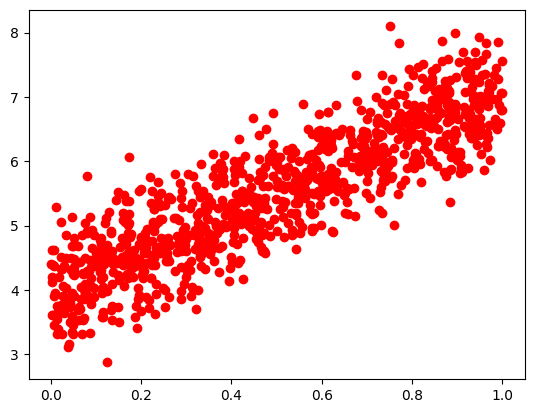

In [7]:
N = 1000
# X = np.random.rand(N, 1)
# y = 4 + 3 * X + np.random.rand(N, 1) * .5
# cov = [[8, -4], [-4, 11]]
# yy = np.random.multivariate_normal((5, 5), cov, N)
# #plt.plot(X, y, 'ro')
# plt.plot(yy[:, 0], yy[:, 1], 'b^')

# X = yy[:, 0]
# y = yy[:, 1]
# X = X.reshape(X.shape[0], 1)
# lr = LinearRegression(fit_intercept = True).fit(X, y)
# XXX = np.linspace(X.min(), X.max(), 2)
# yyy = lr.coef_[0] * XXX + lr.intercept_
# plt.plot(XXX, yyy, 'r-')
# print(lr.coef_[0], lr.intercept_)


#############



X = np.random.rand(N, 1)
y = 3 * X + 4 + .5 * np.random.randn(N, 1)
print(X.shape, y.shape)
plt.plot(X, y, 'ro')

lr = LinearRegression(fit_intercept = True).fit(X, y.reshape(-1))
print(lr.coef_, lr.intercept_)

In [8]:
one = np.ones((1000, 1))
Xbar = np.concatenate((X, one), axis = 1)
print(Xbar.shape, y.shape)

def grad5(i, w):
    x = Xbar[i].reshape((2, 1))
    return x.dot(x.T.dot(w) - y[i].reshape(1, 1))
# w = np.array([[2], [1]])

# print(grad5(3, w).shape)

def gd5(w0, eta):
    it = 0
    for epoch in range(10):
        rd_id = np.random.permutation(N)
        for i in range(N):
            it += 1
            tmp = grad5(rd_id[i], w0)
            w0 = w0 - eta * tmp
            if it > 2000 and np.linalg.norm(grad5(rd_id[i], w0)) / 2 < 1e-4:
                return it, w0
    return it, w0

w0 = np.array([[2], [1]])
print(gd5(w0, 0.1))

(1000, 2) (1000, 1)
(9474, array([[3.04661924],
       [4.09011555]]))


## Gradient Descent level 6 - Mini-batch Gradient Descent
### take the Linear Regression in 5

(1000, 1) (1000, 1)
[2.92095276] 4.056056396545795


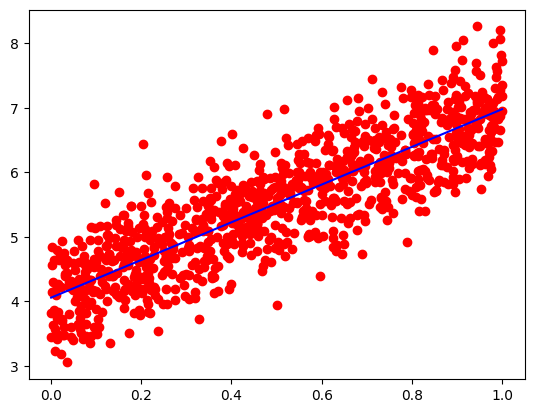

In [87]:

X = np.random.rand(N, 1)
y = 3 * X + 4 + .5 * np.random.randn(N, 1)
print(X.shape, y.shape)
plt.plot(X, y, 'ro')

lr = LinearRegression(fit_intercept = True).fit(X, y.reshape(-1))
print(lr.coef_, lr.intercept_)
lx = np.linspace(X.min(), X.max(), 2)
ly = lx * lr.coef_[0] + lr.intercept_
plt.plot(lx, ly, 'b-')

In [84]:
one = np.ones((1000, 1))
Xbar = np.concatenate((X, one), axis = 1)
print(Xbar.shape, y.shape)

def grad5(rd_id, w, st, en):
    x = Xbar[rd_id[st : en + 1], :].T
    return 1 / (en - st + 1) * x.dot(x.T.dot(w) - y[rd_id[st : en + 1]].reshape(en - st + 1, 1))
# w = np.array([[2], [1]])

# print(grad5(3, w).shape)

def gd5(w0, eta):
    it = 0
    for epoch in range(10):
        rd_id = np.random.permutation(N)
        cnt = 0
        st = 0
        for i in range(N):
            cnt += 1
            it += 1
            if cnt == 50 or i == N - 1:
                cnt = 0
                tmp = grad5(rd_id, w0, st, i)
                w0 = w0 - eta * tmp
                if it > 2000 and np.linalg.norm(grad5(rd_id, w0, st, i)) / 2 < 1e-2:
                    return it, w0
                st = i + 1
    return it, w0

w0 = np.array([[2], [1]])
print(gd5(w0, 0.1))

(1000, 2) (1000, 1)
(5550, array([[3.10302702],
       [3.94498402]]))
